### Modelo de Regresión de Lasso

##### Paso 1: importar los paquetes necesarios
##### Primero, importaremos los paquetes necesarios para realizar la regresión de lasso en Python:

In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

##### Paso 2: cargar los datos
##### Para este modelo, se usará un conjunto de datos llamado recolectados del videojuego FIFA 17, que contiene información sobre jugadores de fútbol.

In [3]:
# Leer en los datos 
data = pd.read_csv('players_17.csv')

# Seleccionar el subconjunto de datos
dataset = data[["short_name", "overall", "pace", "shooting", "passing", "dribbling", "defending", "physic"]]

# Reemplazamos el valor nan por 0
dataset = dataset.replace(np.nan, "0.0")
dataset.head()

,short_name,overall,pace,shooting,passing,dribbling,defending,physic
0,Cristiano Ronaldo,94,92.0,92.0,81.0,91.0,33.0,80.0
1,L. Messi,93,89.0,90.0,86.0,96.0,26.0,61.0
2,Neymar,92,91.0,84.0,78.0,95.0,30.0,56.0
3,M. Neuer,92,0.0,0.0,0.0,0.0,0.0,0.0
4,L. Suárez,92,82.0,90.0,79.0,87.0,42.0,79.0


##### Paso 3: ajuste el modelo de regresión de lazo
##### A continuación, se usará la función LassoCV() de sklearn para ajustar el modelo de regresión de lasso y se usará la función RepeatedKFold() para realizar k-veces la validación cruzada para encontrar el valor alfa óptimo para usar para el término de penalización.
##### Nota: El término «alfa» se usa en lugar de «lambda» en Python.

In [4]:
# definir variables de predicción y respuesta
X = dataset[["pace", "shooting", "passing", "dribbling", "defending", "physic"]]
y = dataset["overall"]

In [16]:
# definir el modelo
model = Lasso(alpha=1.0)
# definir el método para evaluar el modelo
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluar el modelo
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# forzar los scores a valores positivos
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 4.837 (0.085)


In [17]:
# entrenamos el modelo
X = dataset[["pace", "shooting", "passing", "dribbling", "defending", "physic"]]
y = dataset["overall"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
# aplicamos el modelo de Lasso
lasso_model = Lasso().fit(X_train,y_train)

In [ ]:
# sacamos los interceptores
lasso_model.intercept_

61.30397477733538

In [ ]:
# sacamos los coeficientes
lasso_model.coef_

array([-0.20327229,  0.10884158,  0.12149823,  0.07328179,  0.05836948,
       -0.01018474])

In [ ]:
# Coefficients for different lambda values.
lasso = Lasso()
coefs = []
alphas = np.random.randint(0,1000,100)

# 10**np.linspace(10,-2,100)*0.5 -- It can be used instead of alphas and observed.

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)

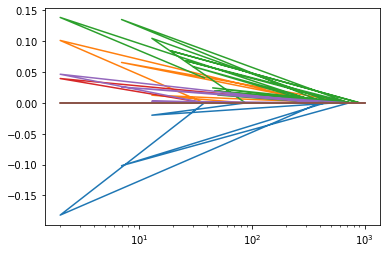

In [ ]:
# graficamos los coeficientes
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

In [ ]:
# generamos la prediccion para los 5 primeras columnas con los datos de entrenamiento
lasso_model.predict(X_train)[:5]

array([67.11561668, 60.40988173, 68.35606066, 69.73582567, 63.62594122])

In [ ]:
# generamos la prediccion para los 5 primeras columnas con los datos de test
lasso_model.predict(X_test)[:5]

array([61.30397478, 70.42149799, 68.98163407, 62.81063525, 69.27583434])

In [ ]:
# generamos el error
r2_score(y_test, y_pred)

0.2576449691230086

In [6]:
# predecimos para datos 
X = dataset[["pace", "shooting", "passing", "dribbling", "defending", "physic"]]
y = dataset["overall"]
# definimos el modelo
model = Lasso(alpha=1.0)
# entrenamos el modelo
model.fit(X, y)
# definimos los datos
row = [92.0, 92.0, 81.0, 91.0, 33.0, 80.0]
# hacemos la predicción
yhat = model.predict([row])
# predecimos para el modelo
print('Predicted: %.3f' % yhat)

Predicted: 70.293
